In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from import_file import *
load_libs()

# 2. NDAWN Dataset

In [2]:
# file_dir = 'D:/NDAWN/fargo/'
# file_dir = 'D:/NDAWN/grand_forks/'
# file_dir = 'D:/NDAWN/williston/'
# file_dir = 'D:/NDAWN/jamestown/'
# file_dir = 'D:/NDAWN/minot/'
file_dir = './data/NDAWN/dickinson/'

file_path = file_dir+'table.csv'
save_file_path  = file_dir+'hr_avg.csv'
df = pd.read_csv(file_path, skipinitialspace=True, dtype={'Year':'object', 'Month':'object', 
                                                          'Day':'object'})
df

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9,11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Station Name,Latitude,Longitude,Elevation,Year,Month,Day,Hour,Avg Wind Speed,Avg Wind Speed Flag,Max Wind Speed,Max Wind Speed Flag,Avg Wind Dir,Avg Wind Dir Flag,Avg Wind Dir SD,Avg Wind Dir SD Flag
0,Dickinson,46.895,-102.813,2557,1990,07,18,100,2.169,NaN,0.000,E,120.900,NaN,19.840,NaN
1,Dickinson,46.895,-102.813,2557,1990,07,18,200,2.187,NaN,0.000,E,146.200,NaN,18.460,NaN
2,Dickinson,46.895,-102.813,2557,1990,07,18,300,2.189,NaN,0.000,E,144.300,NaN,24.140,NaN
3,Dickinson,46.895,-102.813,2557,1990,07,18,400,2.553,NaN,0.000,E,143.700,NaN,18.400,NaN
4,Dickinson,46.895,-102.813,2557,1990,07,18,500,1.806,NaN,0.000,E,148.500,NaN,32.920,NaN
5,Dickinson,46.895,-102.813,2557,1990,07,18,600,1.641,NaN,0.000,E,60.840,NaN,50.560,NaN
6,Dickinson,46.895,-102.813,2557,1990,07,18,700,2.767,NaN,0.000,E,8.280,NaN,10.440,NaN
7,Dickinson,46.895,-102.813,2557,1990,07,18,800,3.005,NaN,0.000,E,54.110,NaN,15.180,NaN
8,Dickinson,46.895,-102.813,2557,1990,07,18,900,4.251,NaN,0.000,E,71.000,NaN,9.280,NaN
9,Dickinson,46.895,-102.813,2557,1990,07,18,1000,4.983,NaN,0.000,E,48.450,NaN,13.480,NaN


In [3]:
df.describe()

,Latitude,Longitude,Elevation,Hour,Avg Wind Speed,Max Wind Speed,Avg Wind Dir,Avg Wind Dir SD
count,2.344800e+05,2.344800e+05,234480.0,234480.000000,234460.000000,234460.000000,234460.000000,234460.000000
mean,4.689500e+01,-1.028130e+02,2557.0,1250.000000,3.807124,5.741044,205.718776,17.263398
std,2.699642e-10,3.699093e-11,0.0,692.220131,2.131628,3.873849,96.691495,11.373789
min,4.689500e+01,-1.028130e+02,2557.0,100.000000,0.000000,0.000000,0.000000,0.000000
25%,4.689500e+01,-1.028130e+02,2557.0,675.000000,2.248000,3.331000,136.600000,10.430000
50%,4.689500e+01,-1.028130e+02,2557.0,1250.000000,3.440000,5.415000,222.400000,13.750000
75%,4.689500e+01,-1.028130e+02,2557.0,1825.000000,4.985000,7.821000,286.700000,19.160000
max,4.689500e+01,-1.028130e+02,2557.0,2400.000000,18.756000,88.922000,360.000000,80.400000


In [4]:
## Output format: date, HrMn, dir, speed, speed_max
df['HrMn']=df['Hour'].apply(lambda x: "%04d"%x ) 
df['date']=df['Year']+df['Month']+df['Day']
df = df[['date','HrMn','Avg Wind Speed', 'Max Wind Speed', 'Avg Wind Dir', 'Avg Wind Dir SD']]
df.rename(columns={'Avg Wind Speed': 'speed', 'Max Wind Speed': 'speed_max', 
                   'Avg Wind Dir': 'dir', 'Avg Wind Dir SD': 'dir_std'}, inplace=True)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [5]:
df

,date,HrMn,speed,speed_max,dir,dir_std
0,19900718,0100,2.169,0.000,120.900,19.840
1,19900718,0200,2.187,0.000,146.200,18.460
2,19900718,0300,2.189,0.000,144.300,24.140
3,19900718,0400,2.553,0.000,143.700,18.400
4,19900718,0500,1.806,0.000,148.500,32.920
5,19900718,0600,1.641,0.000,60.840,50.560
6,19900718,0700,2.767,0.000,8.280,10.440
7,19900718,0800,3.005,0.000,54.110,15.180
8,19900718,0900,4.251,0.000,71.000,9.280
9,19900718,1000,4.983,0.000,48.450,13.480


In [6]:
## too slow, need optimization
import datetime as dt

def my_to_datetime(date_str):
    if date_str[8:10] != '24':
        return pd.to_datetime(date_str, format='%Y%m%d%H%M')

    date_str = date_str[0:8] + '00' + date_str[10:]
    return pd.to_datetime(date_str, format='%Y%m%d%H%M') + \
           dt.timedelta(days=1)
   
df['time']=df["date"].astype(str).map(str)+df["HrMn"]
df['time']=df['time'].apply(my_to_datetime)
df['date']=df['time'].apply(lambda x: x.strftime('%Y%m%d'))
df['HrMn']=df['time'].apply(lambda x: x.strftime('%H%M'))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [7]:
df.speed.value_counts().sort_index()

0.000     19
0.001      5
0.002      3
0.003      2
0.004      2
0.005      1
0.006      1
0.007      1
0.008      1
0.009      2
0.011      2
0.012      2
0.014      3
0.016      1
0.017      2
0.018      2
0.022      1
0.023      1
0.024      1
0.025      1
0.028      2
0.030      1
0.031      2
0.034      2
0.035      1
0.037      1
0.038      1
0.039      2
0.042      2
0.043      2
          ..
15.041     1
15.051     1
15.131     2
15.181     1
15.261     1
15.301     1
15.311     2
15.471     1
15.491     1
15.541     1
15.581     1
15.762     1
15.852     1
15.902     1
15.912     1
15.932     1
16.022     1
16.152     1
16.202     1
16.503     1
16.573     1
16.883     1
16.993     1
17.013     1
17.144     1
17.484     1
17.564     1
17.794     1
17.955     1
18.756     1
Name: speed, dtype: int64

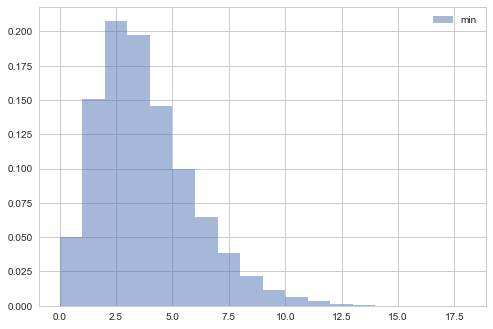

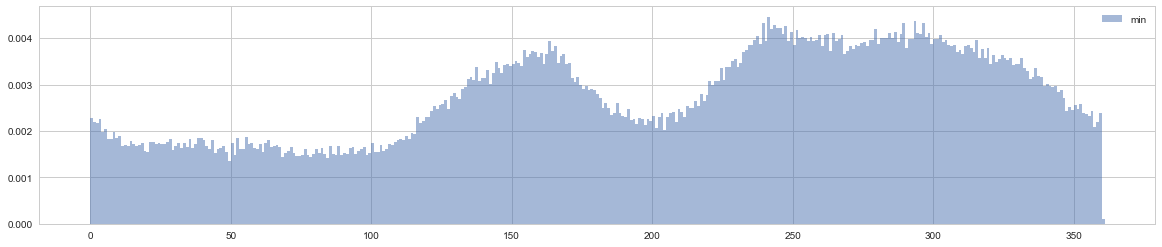

In [8]:
bins=arange(0,df['speed'].max())
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True)

plt.figure()
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True, figsize=(20,4))

In [9]:
df.to_csv(save_file_path, index=False, float_format='%.2f')

In [10]:
sss

NameError: name 'sss' is not defined

# 1. US ASOS Dataset

## 1.1 Combining Files

In [ ]:
# file_dir, save_file_dir  = 'TOP' , 'TOP' # high 0
# file_dir, save_file_dir = 'DEN', './data/asos/denver'

# file_dir, save_file_dir = 'BIS', './data/asos/bismarck_ND'
# file_dir, save_file_dir = 'ABR', './data/asos/aberdeen_SD' # only to 2012
# file_dir, save_file_dir = 'MSP', './data/asos/minneapolis'

# file_dir, save_file_dir = 'LNK', './data/asos/lincoln_NE'
# file_dir, save_file_dir = 'DSM', './data/asos/des_moines_IA'
# file_dir, save_file_dir = 'SPI', './data/asos/springfield_IL'

In [ ]:
from io import StringIO

fout = StringIO()
for year in range(2000,2017):
    for month in range(1,13):
        try: 
            for line in open('D:/1min采样间隔的数据/'+ str(year) + '/'+ file_dir +str(year)+"%02d"%(month)+".dat"):
                fout.write(line.replace("[", " ").replace("]", " ").replace('"', " ").replace('`', " "))
        except: 
            pass
all_data_file = fout.getvalue()
fout.close()

## 1.2 Read from US 1 min

In [ ]:
if file_dir in ["MSP", 'DEN']: 
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ',
                    names = ['stationID','time','vis','day_type','vis2','day_type2','dir','speed','dir_max','speed_max','visual_range', 'unknown'])
else:
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, sep=' ', error_bad_lines=False,
                    names = ['stationID','time','vis','day_type','dir','speed','dir_max','speed_max','unname','visual_range', 'unknown'])

df

In [ ]:
# Drop duplicate
df.drop_duplicates(subset='time', inplace=True)

# Drop too many field
df = df[df['unknown'].isnull()].copy()
df.drop('unknown', axis=1, inplace=True)

# Drop missing field
# Cannot use visual range, since some previous data lack of
df.dropna(subset=['vis', 'dir','speed','dir_max','speed_max'], inplace=True)

df

In [ ]:
df['year_month'] = df['time'].apply(lambda x: x[3:9])
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [ ]:
# Drop non-integer data for direction
df.dir = pd.to_numeric(df.dir, errors='coerce')  # Drop not a number
df = df[df.dir == df.dir // 1] # Drop not an integer
df = df[df['dir'].isin(arange(0,361))] # Drop not in range
df['dir'] = df['dir'].apply(lambda x: int(x)) # Convert back to integer
# Need to consider 0

display(df.dir.value_counts().sort_index())
df.dir.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [ ]:
# Drop non-integer data for speed
df.speed = pd.to_numeric(df.speed, errors='coerce')
df = df[df.speed == df.speed // 1]
df['speed'] = df['speed'].apply(lambda x: int(x))

display(df.speed.value_counts().sort_index())
df.speed.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [ ]:
df.query('(speed > 100) | (speed <0 )')

In [ ]:
df = df.query('(speed <= 100)  & (speed >= 0)')
df = df[df['day_type'].str.contains("D|N") == True]
df['vis']=pd.to_numeric(df['vis'], errors='coerce')
df = df.dropna(subset=['vis'])

df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [ ]:
incre = 10
max_speed = 40
max_count = max_count_for_angles(df, 0, 360, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' %(angle, start_angle, end_angle, len(sub_df)) )
align_figures()

In [ ]:
# Create Output csv

df['HrMn'] = df['time'].apply(lambda x: x[11:15])
df['date'] = df['time'].apply(lambda x: x[3:11])
df['time'] = df['date'].apply(lambda x: x[3:])

df=df[['stationID','date','HrMn', 'vis','day_type','dir','speed','dir_max','speed_max']]
df.to_csv(save_file_dir + '/minute_avg.csv', index=False)

## 1.3 US 1 min to Hour avg

In [ ]:
print(file_dir)

In [ ]:
## Output format: date, HrMn, dir, speed, speed_max

if 'df' not in globals():
    df = pd.read_csv(save_file_dir + '/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

df['date']=pd.to_numeric(df['date'], errors='coerce')
df['speed']=pd.to_numeric(df['speed'], errors='coerce')
df['dir']=pd.to_numeric(df['dir'], errors='coerce')
df['speed_max']=pd.to_numeric(df['speed_max'], downcast='integer', errors='coerce')
df = df.dropna()
df=df[['date','HrMn','dir','speed','speed_max']]
df

In [ ]:
df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
temp_df = df.groupby(['date', 'Hr']).agg({'x' : np.mean,'y': np.mean,'speed_max': np.max}).reset_index()
temp_df['speed']=np.sqrt(temp_df.x**2 + temp_df.y**2)
temp_df['dir']=np.degrees(np.arctan2(temp_df.y, temp_df.x))%360
temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)
temp_df.drop(['Hr', 'x','y'], 1, inplace=True)

### Time Comparison

In [ ]:
bins=arange(0,40)
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True)

In [ ]:
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

In [ ]:
bins=arange(0,370,5)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

### Resample Comparison

In [ ]:
bins=arange(0,362)
for sample_size in [50000, 300000]:
    plt.figure()
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    df.sample(n=sample_size, replace=True)['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min_resampled')
    plt_configure(legend=True, figsize=(20,4))

### Direction Comparison

In [ ]:
incre = 10
max_speed = temp_df.speed.max()

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, _ = select_df_by_angle(df, start_angle, end_angle)
    sub_df_hourly, _ = select_df_by_angle(temp_df, start_angle, end_angle)   

    fig = plt.figure()
    bins = arange(0, max_speed)
    sub_df['speed'].hist(bins=bins, alpha=0.5, label='min', normed=True)
    sub_df_hourly['speed'].hist(bins=bins, alpha=0.5, label='hour', normed=True)
    plt.gca().set_xlim([0, max_speed])
    plt_configure(figsize=(3,1.5), legend=True, title='%s (%s - %s), %s/%s' %(angle, start_angle, end_angle, len(sub_df),len(sub_df_hourly)))
align_figures()

In [ ]:
check_time_shift(df)
check_time_shift(temp_df)

In [ ]:
temp_df.to_csv(save_file_dir + '/hr_avg.csv', index=False, float_format='%.2f')

In [ ]:
sss

# 3. Read from Chinese Data sets

In [ ]:
import csv

ipath= "./data/NCDC/cn/上海/上海/dat.txt"
uipath = unicode(ipath , "utf8")

with open(uipath) as fin, open('./data/NCDC/test.txt', 'w') as fout:
    o=csv.writer(fout)
    for line in fin:
        o.writerow(line.split())